In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
test_feature = pd.read_csv("question-2-test-features.csv", header=None)
test_label = pd.read_csv("question-2-test-labels.csv", header=None)
train_feature = pd.read_csv("question-2-train-features.csv", header=None)
train_label = pd.read_csv("question-2-train-labels.csv", header=None)

In [3]:
# Append one to the left side of matrix
def append_one(x):
    b = np.ones((np.shape(x)[0],np.shape(x)[1]+1))
    b[:,1:] = x
    return b

In [4]:
# TRAINING

In [5]:
# Obtain training data
X_train = append_one(train_feature.values)
Y_train = train_label.values

In [6]:
X_train

array([[ 1.    ,  1.    ,  1.    , ...,  0.2727,  0.8   ,  0.    ],
       [ 1.    ,  1.    ,  2.    , ...,  0.2727,  0.8   ,  0.    ],
       [ 1.    ,  1.    ,  3.    , ...,  0.2879,  0.75  ,  0.    ],
       ...,
       [ 1.    ,  8.    , 11.    , ...,  0.697 ,  0.66  ,  0.1642],
       [ 1.    ,  8.    , 12.    , ...,  0.7121,  0.58  ,  0.2239],
       [ 1.    ,  8.    , 13.    , ...,  0.7424,  0.49  ,  0.3582]])

In [6]:
# Covariance = X^T*X
covariance = np.dot(np.transpose(X_train), X_train)

In [7]:
# Weights = (X^T*X)^-1*X^T*Y
weights = np.dot( np.dot(np.linalg.inv(covariance),np.transpose(X_train)), Y_train)
print("Weights are:")
print(weights)

Weights are:
[[  35.52032936]
 [  -0.47656134]
 [   7.00054171]
 [   1.37221717]
 [  -4.24724733]
 [  68.4775968 ]
 [ 286.19995694]
 [-180.5873212 ]
 [  24.55935004]]


In [8]:
# Rank of the covariance matrix
rank = np.linalg.matrix_rank(covariance)
print("Rank of covariance matrix is " + str(rank))

Rank of covariance matrix is 9


In [9]:
# Predict for training data and calculate the error
Y_predicted = np.dot(X_train, weights)
mse = np.dot(np.transpose(Y_train-Y_predicted), (Y_train-Y_predicted)) / len(Y_predicted)
print("MSE for training data = " + str(mse[0][0]))

MSE for training data = 18204.227976890255


In [10]:
# TEST

In [11]:
# Obtain test data
X_test = append_one(test_feature.values)
Y_test = test_label.values

In [12]:
# Predict for training data and calculate the error
Y_predicted = np.dot(X_test, weights)
mse = np.dot(np.transpose(Y_test-Y_predicted), (Y_test-Y_predicted)) / len(Y_predicted)
print("MSE for test data = " + str(mse[0][0]))

MSE for test data = 40379.06782240535


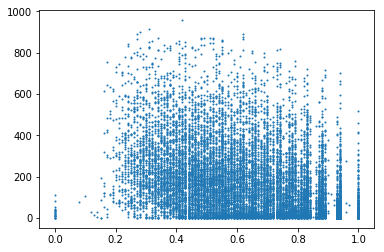

In [38]:
# PLOT
humidity = list(train_feature[6].values) 
total_rental = list(train_label.values)
plt.scatter(humidity, total_rental,s=1)

In [ ]:
# TRAIN ONLY WITH HUMIDITY

In [59]:
append_one(train_feature.iloc[:,[6]].values)

array([[1.  , 0.8 ],
       [1.  , 0.8 ],
       [1.  , 0.75],
       ...,
       [1.  , 0.66],
       [1.  , 0.58],
       [1.  , 0.49]])

In [64]:
# Obtain training data
X_hum = append_one(train_feature.iloc[:,[6]].values)
Y_hum = train_label.values

X_hum_test = append_one(test_feature.iloc[:,[6]].values)
Y_hum_test = test_label.values

In [65]:
# Covariance = X^T*X
covariance = np.dot(np.transpose(X_hum), X_hum)
# Weights = (X^T*X)^-1*X^T*Y
weights = np.dot( np.dot(np.linalg.inv(covariance),np.transpose(X_hum)), Y_hum)
print("Weights are:")
print(weights)

# Predict for training data and calculate the error
Y_predicted = np.dot(X_hum, weights)
mse = np.dot(np.transpose(Y_hum-Y_predicted), (Y_hum-Y_predicted)) / len(Y_predicted)
print("MSE for training data = " + str(mse[0][0]))

# Predict for test data and calculate the error
Y_predicted = np.dot(X_hum_test, weights)
mse = np.dot(np.transpose(Y_hum_test-Y_predicted), (Y_hum_test-Y_predicted)) / len(Y_predicted)
print("MSE for test data = " + str(mse[0][0]))

Weights are:
[[ 348.53430209]
 [-277.64064258]]
MSE for training data = 25134.005722252965
MSE for test data = 48738.79264049626
